In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [13]:
df=pd.read_csv("C:\course\datascience udemy\economic_index.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rohit\AppData\Local\Temp\ipykernel_39528\2189409831.py:1: SyntaxWarning: invalid escape sequence '\c'
  df=pd.read_csv("C:\course\datascience udemy\economic_index.csv")


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [14]:
#drop unnecessary columns oly interest reat eand unemploytene
df=df.drop(columns=["month","year","Unnamed: 0"])
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


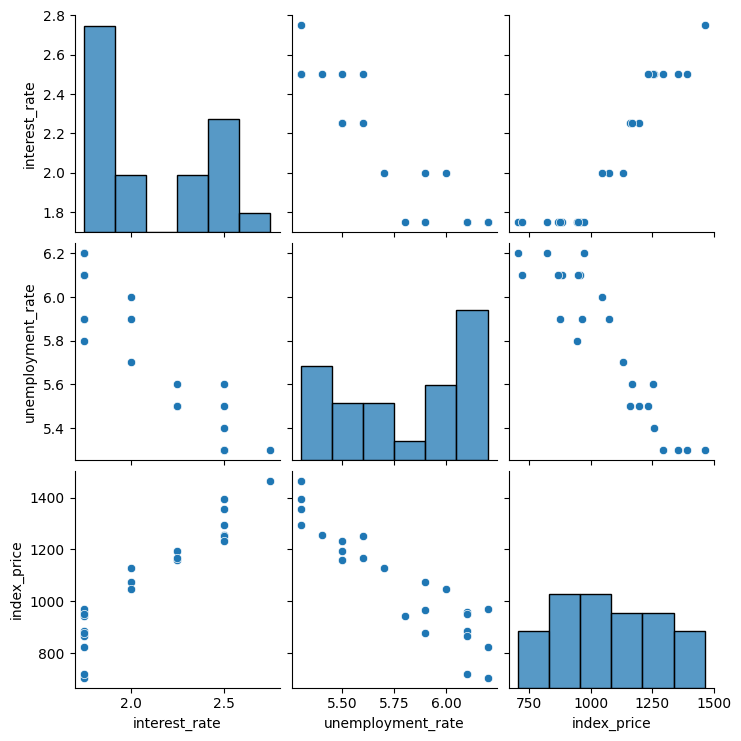

In [15]:
#visulaisation
sns.pairplot(df) 

In [16]:
#correlation 
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [31]:
X=df[["interest_rate","unemployment_rate"]]
y=df["index_price"]
#or
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [38]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(x_train, y_train)

# 4. Predict
y_pred = model.predict(x_test)





MAE: 59.935781523235484
MSE: 5793.762887712569
RMSE: 76.11677139574805
R² Score: 0.8278978091457145


In [43]:

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, r2_score,
    explained_variance_score, max_error
)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# Print all
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")
print(f"Max Error: {max_err:.2f}")


Mean Absolute Error (MAE): 59.94
Mean Squared Error (MSE): 5793.76
Root Mean Squared Error (RMSE): 76.12
Mean Absolute Percentage Error (MAPE): 5.62%
R-squared (R²): 0.83
Explained Variance Score: 0.89
Max Error: 149.35


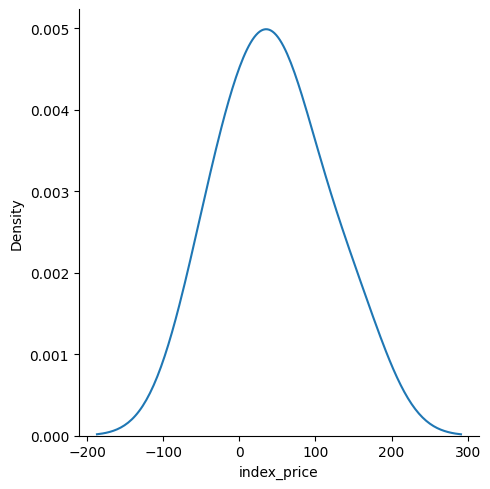

In [48]:
residuals=y_test-y_pred
sns.displot(residuals,kind="kde")

In [57]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Add constant (intercept term) to your X
X_sm = sm.add_constant(X)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_sm, y, test_size=0.25, random_state=42)

# Fit the model using statsmodels
model = sm.OLS(y_train, x_train).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           2.50e-08
Time:                        01:11:38   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2601.6800    997.55

c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
